# Switchboard Benchmark – Evaluation

Analyse der ASR-Ergebnisse für den Mod9 Switchboard Benchmark basierend auf den generierten CSV-Outputs.

## Voraussetzungen
- `load_dotenv()` lädt die Pfade aus `.env` (insbesondere `OUTPUT_PATH`).
- Führe zuvor `python main.py switchboard_benchmark --model whisper` (und optional `--model parakeet`) aus.
- Die resultierenden CSV-Dateien werden im Ordner `outputs/` oder dem in `OUTPUT_PATH` angegebenen Verzeichnis erwartet.

In [1]:
from __future__ import annotations

from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import paths

load_dotenv()
sns.set_theme(style='whitegrid')

DATASET = 'switchboard_benchmark'
output_root = Path(paths.OUTPUT_PATH or 'outputs').expanduser()
if not output_root.is_dir():
    raise FileNotFoundError('OUTPUT_PATH ist nicht gesetzt oder verweist auf kein existierendes Verzeichnis.')

csv_path = output_root / f'{DATASET}.csv'
print(f'CSV Pfad: {csv_path}')
if not csv_path.is_file():
    raise FileNotFoundError(f'Datei nicht gefunden: {csv_path}')

df = pd.read_csv(csv_path)
print(f'Zeilen: {len(df):,}, Spalten: {len(df.columns)}')
df.head()

CSV Pfad: /Volumes/T7 Touch/Experimente/aibay/switchboard_benchmark.csv
Zeilen: 40, Spalten: 15


,conversation_id,channel,speaker_id,audio_path,segment_count,duration_s,gt_transcription,gt_transcription_raw,segments,whisper_large_v3_transcription,whisper_large_v3_segments,whisper_large_v3_wer,parakeet_tdt_v3_transcription,parakeet_tdt_v3_segments,parakeet_tdt_v3_wer
0,sw_4390,A,sw_4390_A,/nfs/scratch/students/witzlch88229/data/mod9_s...,42,296.47,on well currently it i li actually live in vir...,(ON) WELL (%HESITATION) CURRENTLY (IT-) I (LI-...,"[{'start': 0.0, 'end': 0.82, 'label': '<O>', '...","on? Well, currently, I actually live in Virgin...","[{'timestamp': (0.0, 8.98), 'text': ' on? Well...",0.155763,"Well, um currently I I actually live in Virgin...","[{'segment': 'Well, um currently I I actually ...",0.227414
1,sw_4390,B,sw_4390_B,/nfs/scratch/students/witzlch88229/data/mod9_s...,41,297.21,all right jeff well what do you think of capit...,ALL RIGHT JEFF WELL (%HESITATION) WHAT DO YOU ...,"[{'start': 0.0, 'end': 3.74, 'label': '<O>', '...","All right, Jeff. Well, what do you think of ca...","[{'timestamp': (0.0, 2.96), 'text': ' All righ...",0.247098,"All righty, Jeff. Well, uh what do you think o...","[{'segment': 'All righty, Jeff.', 'start_offse...",0.137645
2,sw_4484,A,sw_4484_A,/nfs/scratch/students/witzlch88229/data/mod9_s...,47,298.63,you don't have any children yet well i have th...,YOU DON'T HAVE ANY CHILDREN YET WELL I HAVE TH...,"[{'start': 5.49, 'end': 7.73, 'label': '<O>', ...","You don't have any children yet. Well, I have ...","[{'timestamp': (0.0, 265.08), 'text': "" You do...",0.136247,"You don't have any children yet. Well, I have ...","[{'segment': ""You don't have any children yet....",0.044987
3,sw_4484,B,sw_4484_B,/nfs/scratch/students/witzlch88229/data/mod9_s...,33,290.29,okay i personally don't know a whole lot i'm i...,OKAY (%HESITATION) I PERSONALLY DON'T KNOW A W...,"[{'start': 0.41, 'end': 6.26, 'label': '<O>', ...","Okay, I personally don't know a whole lot. I'm...","[{'timestamp': (0.0, 3.28), 'text': "" Okay, I ...",0.333333,"Okay, um I'm not so many I'm I'm twenty-one ye...","[{'segment': ""Okay, um I'm not so many I'm I'm...",0.624113
4,sw_4507,A,sw_4507_A,/nfs/scratch/students/witzlch88229/data/mod9_s...,52,297.19,right umhum uhhuh well we have a budget we get...,RIGHT UM-HUM UH-HUH (%HESITATION) WELL WE HAVE...,"[{'start': 0.0, 'end': 2.47, 'label': '<O>', '...","Well, we have a budget. We get paid every two ...","[{'timestamp': (0.0, 45.86), 'text': "" Well, w...",0.116613,"Uhhuh. Um, well we have a budget. Um, we get p...","[{'segment': 'Uhhuh.', 'start_offset': 87, 'en...",0.092652


## Modell- und Referenzspalten
Liste aller verfügbaren Transkript- und WER-Spalten zur Orientierung.

In [2]:
wer_columns = [col for col in df.columns if col.endswith('_wer')]
transcript_columns = [col for col in df.columns if col.endswith('_transcription')]
print('Transcriptions:', transcript_columns)
print('WER columns:', wer_columns)

Transcriptions: ['gt_transcription', 'whisper_large_v3_transcription', 'parakeet_tdt_v3_transcription']
WER columns: ['whisper_large_v3_wer', 'parakeet_tdt_v3_wer']


## Grundlegende WER-Statistiken
Zeigt Mittelwert, Median und Standardabweichung je vorhandener Modellspalte.

In [3]:
stats = {}
for col in wer_columns:
    stats[col] = {
        'mean': df[col].mean(),
        'median': df[col].median(),
        'std': df[col].std(),
        'min': df[col].min(),
        'max': df[col].max(),
    }
pd.DataFrame(stats).T

,mean,median,std,min,max
whisper_large_v3_wer,0.220080,0.195622,0.125436,0.054598,0.767654
parakeet_tdt_v3_wer,0.181093,0.135366,0.141135,0.044987,0.710706


In [4]:
if not wer_columns:
    print("⚠ No WER columns available; skipped LaTeX export.")
else:
    model_display = {
        "whisper_large_v3_wer": "Whisper Large V3",
        "parakeet_tdt_v3_wer": "Parakeet TDT v3",
    }
    rows: list[dict[str, float | int | str]] = []
    for col in wer_columns:
        series = df[col].dropna()
        if series.empty:
            continue
        model_name = model_display.get(col)
        if not model_name:
            model_name = col.replace("_wer", "").replace("_", " " ).title()
        rows.append(
            {
                "Model": model_name,
                "Samples": int(series.count()),
                "Mean WER (%)": float(series.mean() * 100),
                "Median WER (%)": float(series.median() * 100),
            }
        )
    if not rows:
        print("⚠ No valid WER values found; nothing to export.")
    else:
        latex_table = (
            pd.DataFrame(rows)
            .sort_values("Mean WER (%)")
            .reset_index(drop=True)
        )
        latex_caption = (
            "Word Error Rates on the Switchboard benchmark show that ASR performance "
            "on real conversational dialogue remains challenging."
        )
        latex_label = "tab:switchboard_benchmark_wer"
        latex_output_path = output_root / "switchboard_benchmark_wer_table.tex"
        latex_string = latex_table.to_latex(
            index=False,
            caption=latex_caption,
            label=latex_label,
            float_format=lambda x: f"{x:.1f}\\%",
            column_format="lrrr",
        )
        latex_output_path.write_text(latex_string, encoding="utf-8")
        print(f"Saved LaTeX table to {latex_output_path}")
        print("\n" + latex_string)


Saved LaTeX table to /Volumes/T7 Touch/Experimente/aibay/switchboard_benchmark_wer_table.tex

\begin{table}
\caption{Word Error Rates on the Switchboard benchmark show that ASR performance on real conversational dialogue remains challenging.}
\label{tab:switchboard_benchmark_wer}
\begin{tabular}{lrrr}
\toprule
Model & Samples & Mean WER (%) & Median WER (%) \\
\midrule
Parakeet TDT v3 & 40 & 18.1\% & 13.5\% \\
Whisper Large V3 & 40 & 22.0\% & 19.6\% \\
\bottomrule
\end{tabular}
\end{table}



## Histogramm der WER-Verteilung
Vergleicht die Verteilung der Modelle (falls mehrere WER-Spalten vorhanden sind).

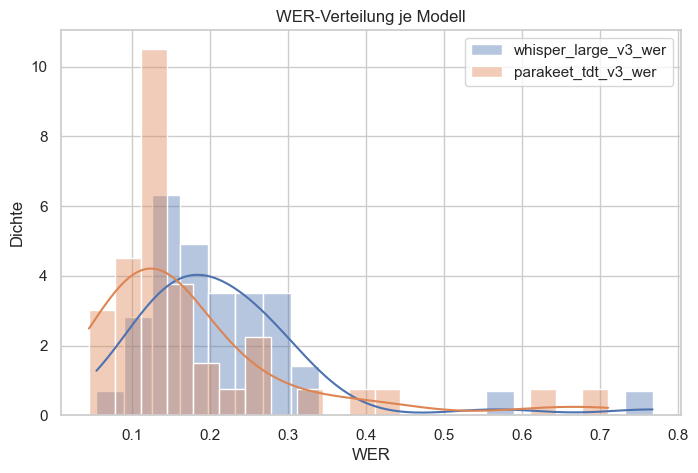

In [5]:
if wer_columns:
    fig, ax = plt.subplots(figsize=(8, 5))
    for col in wer_columns:
        sns.histplot(df[col], bins=20, stat='density', kde=True, label=col, ax=ax, alpha=0.4)
    ax.set_xlabel('WER')
    ax.set_ylabel('Dichte')
    ax.set_title('WER-Verteilung je Modell')
    ax.legend()
else:
    print('Keine WER-Spalten gefunden.')

## Gesprächs-Level Analyse
Aggregiert die WER je Conversation/Speaker, um Ausreißer zu identifizieren.

In [6]:
key_columns = ['conversation_id', 'speaker_id']
available = [col for col in key_columns if col in df.columns]
if not available:
    print('Keine Gesprächs-IDs verfügbar.')
else:
    group_cols = available
    summary = df.groupby(group_cols)[wer_columns].mean().reset_index() if wer_columns else df[group_cols]
    summary.sort_values(wer_columns[0] if wer_columns else group_cols[0]).head()

In [7]:
if wer_columns and available:
    worst = summary.sort_values(wer_columns[0], ascending=False).head()
    worst

## Transcript-Spotchecks
Vergleich Roh- und bereinigte Referenzen für Stichproben.

In [8]:
ref_cols = ['gt_transcription_raw', 'gt_transcription']
existing = [col for col in ref_cols if col in df.columns]
if existing:
    sample = df.sample(n=3, random_state=42)[existing + transcript_columns][:3]
    sample.T
else:
    print('Keine Referenzspalten gefunden.')